In [19]:
# Define paths
import sys
sys.path.append('..')

training_path = '../data/training_data/'
verification_path = '../data/verification_data/'
results_path = 'results'
interpolating_for = 'sin'

In [20]:
# Define polynomial utilities (1D, square matrix)
import numpy as np
import sympy

def get_polynomial_matrix(interpolation_points: np.ndarray) -> np.ndarray:
    n_rows = n_cols = interpolation_points.shape[0]
    matrix = np.zeros(shape = (n_rows, n_cols))
    for col_index in range(n_cols):
        matrix[:, col_index] = interpolation_points ** col_index
    return matrix

def get_polynomial_interpolant(interpolation_points: np.ndarray, 
                               target_points: np.ndarray) -> sympy.Poly:
    matrix = get_polynomial_matrix(interpolation_points)
    coefs = np.linalg.solve(matrix, target_points)
    return sympy.Poly.from_list(np.flip(coefs), sympy.Symbol('x'))

In [22]:
import pandas as pd

verification_data = pd.read_csv(f"{verification_path}/verification_{interpolating_for}_linspace_{10000}.csv")
n_inputs = [1, 2, 4, 8, 16, 32, 64]

# Task 1 - Interpolate

In [23]:
for N in n_inputs:
    print(N)
    input_data = pd.read_csv(f"{training_path}input_{interpolating_for}_{N}_stepped.csv")
    x = input_data['x'].to_numpy()
    y = input_data['y'].to_numpy()

    interpolator = get_polynomial_interpolant(x, y)

    interpolations = []
    for point_index in verification_data['x']:
        interpolations += [interpolator(point_index)]

    pd.DataFrame(data = { 'x': verification_data['x'],
                'y_target': verification_data['y'], 
                'interpolation': interpolations })\
        .to_csv(f'{results_path}/training_performance_{interpolating_for}_input{N}_stepped_LSQ.csv',
                index=False)

1


2
4
8
16
32
64


# Task 2 - Evaluate interpolation performance

## 2.1 - Informal comparison

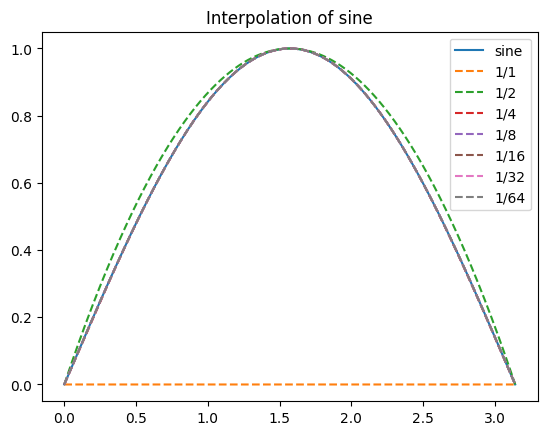

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

plt.plot(verification_data['x'], verification_data['y'], label = 'sine')
file_path = f'training_performance_{interpolating_for}_input'
for N in n_inputs:
    df = pd.read_csv(f'{results_path}/{file_path}{N}_stepped_LSQ.csv')
    plt.plot(df['x'], df['interpolation'], label = f'1/{N}', linestyle='--')
plt.legend()
plt.title('Interpolation of sine')
plt.show()

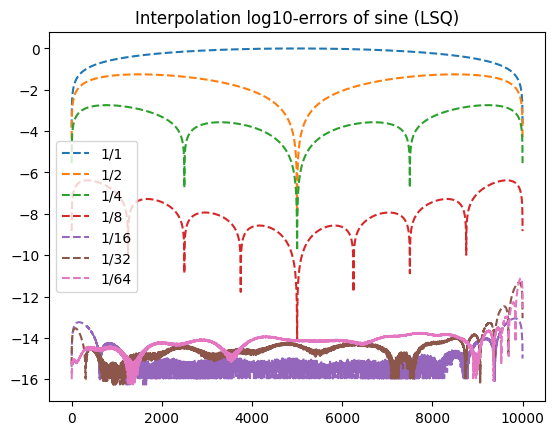

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

with np.errstate(divide='ignore'): # ignore cases when division by zero appears
    for N in n_inputs:
        df = pd.read_csv(f'{results_path}/training_performance_{interpolating_for}_input{N}_stepped_LSQ.csv')
        errors_list = np.log10(np.abs(df['y_target'].to_numpy() - df['interpolation'].to_numpy()))
        plt.plot(errors_list, label = f'1/{N}', linestyle='--')
    plt.legend()
    plt.title('Interpolation log10-errors of sine (LSQ)')
    plt.show()

Text(0, 0.5, '2-norm of error (log10)')

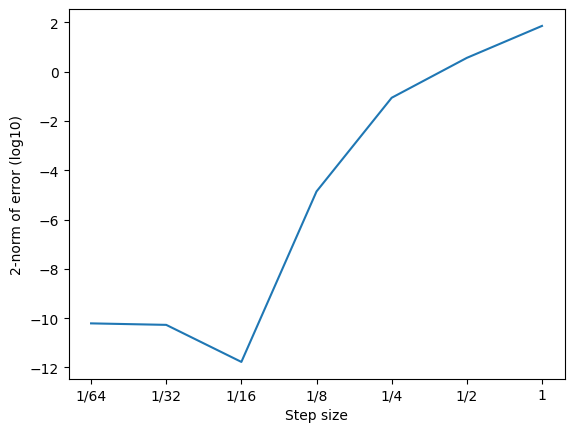

In [40]:
import matplotlib.pyplot as plt

errors_list = []
for N in n_inputs:
    df = pd.read_csv(f'{results_path}/training_performance_{interpolating_for}_input{N}_stepped_LSQ.csv')
    errors_list += [np.log10(np.sqrt(np.sum(np.abs(df['y_target'].to_numpy() - df['interpolation'].to_numpy()) ** 2)))]

plt.plot(np.flip(['1', '1/2', '1/4', '1/8', '1/16', "1/32", "1/64"]), np.flip(errors_list))
plt.xlabel('Step size')
plt.ylabel('2-norm of error (log10)')